# TF-Vision Tutorial - YOLO (Object Detectors, You Only Look Once) v3

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tensorflow/models/blob/master/official/vision/beta/projects/movinet/movinet_tutorial.ipynb) -->
<!-- [![TensorFlow Hub](https://img.shields.io/badge/TF%20Hub-Models-FF6F00?logo=tensorflow)](https://tfhub.dev/google/collections/movinet) -->


[![YOLOv3](http://img.shields.io/badge/Paper-arXiv.1804.02767-B3181B?logo=arXiv)](https://arxiv.org/abs/1804.02767)

YOLOv3: An Incremental Improvement





The TensorFlow Model Garden (TFMG) has a modular structure, supporting component re-use between exemplar implementations. Modularity both simplifies implementation, andaccelerates innovation: model components can be recombined into a new model per-forming a different function. For example, the YOLO family is targeted towards object detection, but can be used for image classification by connecting an image classification head to the current backbone.


In this Colab Notebook, we will be using the YOLOv3 model to show how to create a TensorFlow Model Garden project by following [TFMG components](https://github.com/tensorflow/models/tree/master/official/vision/beta/projects/example). Also, TensorFlow provides compenhensive framework and API to support your TFMG project, including [TensorFlow Hub](https://www.tensorflow.org/hub) and [TensorFlow Datasets](https://www.tensorflow.org/datasets). 




In this tutorial, we provide a step-by-step example which works for both building a model from scratch and directly loading the pre-trained model from TensorFlow Hub for detection.



# Step 0: Setup

It is recommended to run the models using GPUs or TPUs. 

To select a GPU/TPU in Colab, select `Runtime > Change runtime type > Hardware accelerator` dropdown in the top menu. 

If you upgraded to **[Colab PRO](https://colab.research.google.com/signup)**, check [![Colab Pro](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/notebooks/pro.ipynb) for using priority access to our fastest GPUs. 


## 0.1 Install the TensorFlow Model Garden requires pip packages

TensorFlow provides compenhensive framework and API tools to support TFMG. Here is briefly introduce: 

1. Install **TensorFlow 2** packages: 
    - `pip install tensorflow` : Latest stable release with CPU and GPU support (Ubuntu and Windows)
    - `pip install tf-nightly` : Preview build (unstable) . Ubuntu and Windows include GPU support .
    - For more details or older version, please check TF official document [here](https://www.tensorflow.org/install/pip). 


2. Install **TensorFlow Model Garden** packages: <font color='red'>(## TODO: May change or add more info)</font>
    - `pip install tf-models-official` : Latest stable Model Garden package. Note that it may not include the latest changes in the `tensorflow_models` github repo.
    - `pip install tf-models-nightly` : Preview build (unstable). Note that to include latest changes, you may install `tf-models-nightly`, which is the nightly Model Garden package created daily automatically. 


3. Install **TensorFlow Datasets** packages:
    - `pip install tensorflow-datasets` : The stable version, released every few months.
    - `pip install tfds-nightly` : Released every day, contains the last versions of the datasets.
    - For more details or older version, please check TFDS official document [here](https://www.tensorflow.org/datasets/overview). 


4. After installed TensorFlow, install **TensorFlow Hub** package:
    - `pip install tensorflow-hub` : The stable version, work for both TensorFlow 2 and TensorFlow 1. We recommend that new users start with TensorFlow 2 right away, and current users upgrade to it.
    - `pip install tf-hub-nightly` : Built automatically from the source code on github, with no release testing. 
    - For more details, please check TF Hub official document [here](https://www.tensorflow.org/hub/installation)

For above packages, `pip` will install all models and dependencies automatically.

In this Colab, we use the `nightly` versions of TFMG and TFDS, and the stable version of TF2 and TF Hub. Run the comments below:

```bash
$ !pip install -q tensorflow tensorflow-hub tf-models-nightly tfds-nightly 
```

In [ ]:
# install TF Hub, TFMG, TFDS if not exist
!pip install -q tensorflow-hub tf-models-nightly tfds-nightly 

## 0.2 Import Required Packages

Now, import packages as below and we will show specific usage of TensorFlow's packages in follwing sections. 

In [ ]:
# import tf, tfds, hub
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

# other module 
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Step 1: Create Model

In this section, we will provide how YOLOv3 model can be created from scratch and how to load pre-trained models from TensorFlow Hub. 

In section 1.1, we provide an example how to build YOLOv3 from scratch, including the DarkNet architecture and other principle functions in YOLOv3. In section 1.2, we will update the usage of YOLO collections on TF hub soon once the pre-trained models and checkpoints have been published. 

## 1.0 Example Model

In `example_model`.py, we show how to create a new model. The ExampleModel is a subclass of `tf.keras.Model` that defines necessary parameters. Here, you need to have `input_specs` to specify the input shape and dimensions, and build layers within constructor:

```python
class ExampleModel(tf.keras.Model):
  def __init__(
    self,
    num_classes: int,
    input_specs: tf.keras.layers.InputSpec = tf.keras.layers.InputSpec(
        shape=[None, None, None, 3]),
    **kwargs):
    # Build layers.
```

Given the `ExampleModel`, you can define a function that takes a model config as input and return an `ExampleModel` instance, similar as `build_example_model`. As a simple example, we define a single model. However, you can split the model implementation to individual components, such as backbones, decoders, heads, as what we do here. And then in `build_example_model` function, you can hook up these components together to obtain your full model.

<font color='red'>(## TODO: The `build_example_model` above should link to a code snippet or github gist link, the link may claim in an internal doc of TF. )</font>

## 1.1 Build YOLOv3 from scratch

YOLOv3 uses a new network architecture (DarkNet-53) for performing feature extraction, it's a hybrid approach between the network used in YOLOv2 (DarkNet-19) and residual network stuff. For the crucial functions of YOLOv3 (e.g. bounding boxes, non-max suppression, and IoU), we will provide the functions in the Step 1 (Create Model) and will use them in Step 4 (Create Task). 


### 1.1.1 Build the DarkNet-53 Architecture

The network architecture of the model will be the **Model** component. 

Component: `example_model.py`

<font color='red'>(## TODO: need to check 81-83 layers)</font>

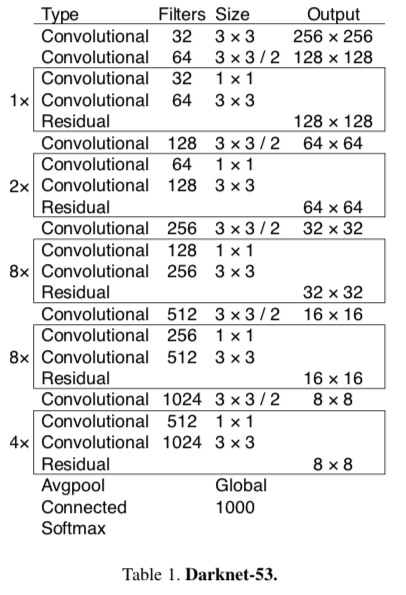

In [ ]:
## modifed from exmaple_model.py => yolo3_model.py

"""A sample model implementation.
This is only a dummy example to showcase how a model is composed. It is usually
not needed to implement a modedl from scratch. Most SoTA models can be found and
directly used from `official/vision/beta/modeling` directory.
"""

from typing import Any, Mapping
# Import libraries
import tensorflow as tf
from official.vision.beta.projects.yolo3 import yolo3_config as yolo3_cfg ## TODO 


@tf.keras.utils.register_keras_serializable(package='Vision')
class Yolo3Model(tf.keras.Model):
  """A example model class.
  A model is a subclass of tf.keras.Model where layers are built in the
  constructor.
  """
    def __init__(
        self,
        num_classes: int,
        input_specs: tf.keras.layers.InputSpec = tf.keras.layers.InputSpec(
            shape=[None, None, None, 3]),
        **kwargs):
        """Initializes the example model.
        All layers are defined in the constructor, and config is recorded in the
        `_config_dict` object for serialization.
        Args:
        num_classes: The number of classes in classification task.
        input_specs: A `tf.keras.layers.InputSpec` spec of the input tensor.
        **kwargs: Additional keyword arguments to be passed.
        """
        inputs = tf.keras.Input(shape=input_specs.shape[1:], name=input_specs.name)

        # Layer 0 => 1 : 
        outputs = self.conv_block(inputs, [
            {'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
            {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1}
        ], skip=False)

        # Layer 2 => 4 : Layer 4 Residual
        outputs = self.conv_block(outputs, [    
            {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
            {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}
        ], skip=True)

        # Layer 5 
        outputs = self.conv_block(outputs, [
            {'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5}
        ], skip=False)

        # Layer 6 => 11 : Layer 8/11 Residual
        for i in range(2):
            outputs = self.conv_block(outputs, [
                {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6 + i * 3},
                {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7 + i * 3}
            ], skip=True)

        # Layer 12 
        outputs = self.conv_block(outputs, [
            {'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12}
        ], skip=False)

        # Layer 13 => 36
        for i in range(8):
            outputs = self.conv_block(outputs, [
                {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13 + i * 3},
                {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14 + i * 3}
            ], skip=True)
        skip_36 = outputs

        # Layer 37 => 40
        outputs = self.conv_block(outputs, [
            {'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37}
        ], skip=False)

        # Layer 41 => 61
        for i in range(8):
            outputs = self.conv_block(outputs, [
                {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38 + i * 3},
                {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39 + i * 3}
            ])
        skip_61 = outputs

        # Layer 62 
        outputs = self.conv_block(outputs, [
            {'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62}
        ], skip=False)

        # Layer 63 => 74
        for i in range(4):
            outputs = self.conv_block(outputs, [
                {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63 + i * 3},
                {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64 + i * 3}
            ], skip=True)

        # Layer 75 => 80
        for i in range(3):
            outputs = self.conv_block(outputs, [
                {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75 + i * 2},
                {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76 + i * 2}
            ], skip=False)

        ## TODO: check the Layer 81

        # Layer 82
        yolo_82 = self.conv_block(outputs, [
            {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}
        ], skip=False)

        ## TODO: check layer_idx
        # Layer 83 => 86
        outputs = self.conv_block(outputs, [
            {'filter':  256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}, 
        ], skip=False)
        outputs = tf.keras.layers.UpSampling2D(2)(outputs)
        outputs = tf.keras.layers.concatenate([outputs, skip_61])

        # Layer 87 => 92
        for i in range(3):
            outputs = self.conv_block(outputs, [
                {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87 + i * 2},
                {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88 + i * 2}
            ], skip=False)

        # Layer 93 => 94
        yolo_94 = self.conv_block(outputs, [
            {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}
        ])

        # Layer 95 => 98
        outputs = self.conv_block(outputs, [
            {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 96},
        ])
        outputs = tf.keras.layers.UpSampling2D(2)(outputs)
        outputs = tf.keras.layers.concatenate([outputs, skip_36])

        # Layer 99 => 106
        yolo_106 = self.conv_block(outputs, [
            {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 99},
            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 100},
            {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 101},
            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 102},
            {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 103},
            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 104},
            {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}
        ])
        
        # final model 
        self.model = tf.keras.Model(inputs, [yolo_82, yolo_94, yolo_106], name='yolo3_model')

        super().__init__(inputs=inputs, outputs=outputs, **kwargs)
        self._input_specs = input_specs
        self._config_dict = {'num_classes': num_classes, 'input_specs': input_specs}


    def conv_block(self, input_img, convs, skip=True):
        x = input_img
        count = 0
        for conv in convs:
            if count == (len(convs) - 2) and skip:
                skip_connection = x
            count += 1
            if conv['stride'] > 1:
                # peculiar padding as darknet prefer left and top
                x = tf.keras.layers.ZeroPadding2D(((1, 0), (1, 0)))(x)
            x = tf.keras.layers.Conv2D(
                    filters=conv['filter'],
                    kernel_size=conv['kernel'],
                    strides=conv['stride'],
                    # peculiar padding as darknet prefer left and top
                    padding='valid' if conv['stride'] > 1 else 'same',
                    name='conv_' + str(conv['layer_idx']), 
                    use_bias=False if conv['bnorm'] else True )(x)
            if conv['bnorm']:
                x = tf.keras.layers.BatchNormalization(
                    name='bnorm_' + str(conv['layer_idx']))(x)
            if conv['leaky']:
                x = tf.keras.layers.LeakyReLU(
                    alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
        return skip_connection + x if skip else x



    def get_config(self) -> Mapping[str, Any]:
        """Gets the config of this model."""
        return self._config_dict

    @classmethod
    def from_config(cls, config, custom_objects=None):
        """Constructs an instance of this model from input config."""
        return cls(**config)


def build_yolo3_model(input_specs: tf.keras.layers.InputSpec,
                        model_config: yolo3_cfg.Yolo3Model,  ## TODO
                        **kwargs) -> tf.keras.Model:

    """Builds and returns the example model.
    This function is the main entry point to build a model. Commonly, it build a
    model by building a backbone, decoder and head. An example of building a
    classification model is at
    third_party/tensorflow_models/official/vision/beta/modeling/backbones/resnet.py.
    However, it is not mandatory for all models to have these three pieces
    exactly. Depending on the task, model can be as simple as the example model
    here or more complex, such as multi-head architecture.
    Args:
        input_specs: The specs of the input layer that defines input size.
        model_config: The config containing parameters to build a model.
        **kwargs: Additional keyword arguments to be passed.
    Returns:
        A tf.keras.Model object.
    """

    return Yolo3Model(
        num_classes=model_config.num_classes, input_specs=input_specs, **kwargs)


<font color='red'>(## TODO: helping check architecture, it will be removed after)</font>

```bash
$ ./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg                                                                                                                                                    [2:24:08]
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 152 x 128   ->   152 x 152 x 128
   12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   14 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   15 res   12                  76 x  76 x 256   ->    76 x  76 x 256
   16 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   17 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   18 res   15                  76 x  76 x 256   ->    76 x  76 x 256
   19 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   20 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   21 res   18                  76 x  76 x 256   ->    76 x  76 x 256
   22 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   23 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   24 res   21                  76 x  76 x 256   ->    76 x  76 x 256
   25 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   26 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   27 res   24                  76 x  76 x 256   ->    76 x  76 x 256
   28 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   29 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   30 res   27                  76 x  76 x 256   ->    76 x  76 x 256
   31 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   32 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   33 res   30                  76 x  76 x 256   ->    76 x  76 x 256
   34 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
   35 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
   36 res   33                  76 x  76 x 256   ->    76 x  76 x 256
   37 conv    512  3 x 3 / 2    76 x  76 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   38 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   39 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   40 res   37                  38 x  38 x 512   ->    38 x  38 x 512
   41 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   42 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   43 res   40                  38 x  38 x 512   ->    38 x  38 x 512
   44 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   45 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   46 res   43                  38 x  38 x 512   ->    38 x  38 x 512
   47 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   48 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   49 res   46                  38 x  38 x 512   ->    38 x  38 x 512
   50 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   51 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   52 res   49                  38 x  38 x 512   ->    38 x  38 x 512
   53 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   54 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   55 res   52                  38 x  38 x 512   ->    38 x  38 x 512
   56 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   57 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   58 res   55                  38 x  38 x 512   ->    38 x  38 x 512
   59 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   60 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   61 res   58                  38 x  38 x 512   ->    38 x  38 x 512
   62 conv   1024  3 x 3 / 2    38 x  38 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   63 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   64 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   65 res   62                  19 x  19 x1024   ->    19 x  19 x1024
   66 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   67 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   68 res   65                  19 x  19 x1024   ->    19 x  19 x1024
   69 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   70 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   71 res   68                  19 x  19 x1024   ->    19 x  19 x1024
   72 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   73 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   74 res   71                  19 x  19 x1024   ->    19 x  19 x1024
   75 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   76 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   77 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   78 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   79 conv    512  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 512  0.379 BFLOPs
   80 conv   1024  3 x 3 / 1    19 x  19 x 512   ->    19 x  19 x1024  3.407 BFLOPs
   81 conv    255  1 x 1 / 1    19 x  19 x1024   ->    19 x  19 x 255  0.189 BFLOPs
   82 yolo
   83 route  79
   84 conv    256  1 x 1 / 1    19 x  19 x 512   ->    19 x  19 x 256  0.095 BFLOPs
   85 upsample            2x    19 x  19 x 256   ->    38 x  38 x 256
   86 route  85 61
   87 conv    256  1 x 1 / 1    38 x  38 x 768   ->    38 x  38 x 256  0.568 BFLOPs
   88 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   89 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   90 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   91 conv    256  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 256  0.379 BFLOPs
   92 conv    512  3 x 3 / 1    38 x  38 x 256   ->    38 x  38 x 512  3.407 BFLOPs
   93 conv    255  1 x 1 / 1    38 x  38 x 512   ->    38 x  38 x 255  0.377 BFLOPs
   94 yolo
   95 route  91
   96 conv    128  1 x 1 / 1    38 x  38 x 256   ->    38 x  38 x 128  0.095 BFLOPs
   97 upsample            2x    38 x  38 x 128   ->    76 x  76 x 128
   98 route  97 36
   99 conv    128  1 x 1 / 1    76 x  76 x 384   ->    76 x  76 x 128  0.568 BFLOPs
  100 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
  101 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
  102 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
  103 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128  0.379 BFLOPs
  104 conv    256  3 x 3 / 1    76 x  76 x 128   ->    76 x  76 x 256  3.407 BFLOPs
  105 conv    255  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 255  0.754 BFLOPs
  106 yolo
Loading weights from yolov3.weights...Done!
data/dog.jpg: Predicted in 24.269431 seconds.
bicycle: 99%
truck: 92%
dog: 100%
```

### 1.1.2 Define functions for YOLOv3 

In [YOLOv2 (YOLO9000)](https://arxiv.org/abs/1612.08242), they used bounding boxes in dimension clusters as anchor boxes then computed sum of squared loss. 

In [YOLOv3](https://arxiv.org/abs/1804.02767), they predict an objectness score for each bounding box using logistic regression. This should be 1 if the bounding box prior overlaps a ground truth object by more than any other bounding box prior. If the bounding box prior is not the best but does overlap a ground truth object by more than some threshold we ignore the prediction. 

So, the functions defined below:

- Bounding boxes
- Non-Max Suppression
- Interval overlap
- Intersection over Union (IoU)
- Sigmoid function

In [ ]:
## model.py or task.py ?

## tf.image.draw_bounding_boxes(). https://www.tensorflow.org/api_docs/python/tf/image/draw_bounding_boxes

class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax
        
        self.objness = objness
        self.classes = classes

        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes)
        
        return self.label
    
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()]
            
        return self.score


## tf.image.non_max_suppression()  https://www.tensorflow.org/api_docs/python/tf/image/non_max_suppression

def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return
        
    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])

        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]

            if boxes[index_i].classes[c] == 0: continue

            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]

                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

In [ ]:
def _sigmoid(x):
    return 1. / (1. + np.exp(-x))


## tf.keras.metrics.MeanIoU()

def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
    
    intersect = intersect_w * intersect_h

    w1, h1 = box1.xmax - box1.xmin, box1.ymax - box1.ymin
    w2, h2 = box2.xmax - box2.xmin, box2.ymax - box2.ymin
    
    union = w1*h1 + w2*h2 - intersect
    
    return float(intersect) / union


### 1.1.3 Decode the output of network

<font color='red'>(## TODO: the structure of this section may change based on Step 4)</font>

## 1.2 Load from TensorFlow Hub 

<font color='red'>(## TODO: This section will be added after YOLO collection published. )</font>

TensorFlow Hub is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. Reuse trained models like BERT and Faster R-CNN with just a few lines of code.

We will update the TF hub link here after the YOLO collections published. 

### 1.2.1 SavedModels in TensorFlow Hub (`tfhub.dev`)

> (TODO) Publishing process: https://www.tensorflow.org/hub/publish

```python
import tensorflow_hub as hub

model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")
embeddings = model(["The rain in Spain.", "falls",
                    "mainly", "In the plain!"])

print(embeddings.shape)  #(4,128)
```

### 1.2.2 Example Using SavedModels from TF Hub

> (TODO) SavedModels from TF Hub in TensorFlow 2: https://www.tensorflow.org/hub/tf2_saved_model

Load YOLO-Base from TensorFlow Hub, as part of the [YOLO collection](LINK).

The following code will:

- Load a YOLO KerasLayer from [tfhub.dev](https://tfhub.dev).
- Wrap the layer in a [Keras Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model).
- Load an example image, and do object detection. 

# Step 2: Create Dataloader

This section is following the Sec 1.1 (build YOLO from scratch), we can download pre-trained weigths from author's official source. We will have a `DataLoader` to load and parse weights into our DarkNet-53 architecture. 


## 2.1.1 Load pre-trained weights 

In practial, we can use the pre-treained models to do detection task directly.

Also, if we have custom improvement models, the pre-trained weights might be crucial to start training to achieve SOTA. 

The weights trained on COCO have been provided and can be loaded from official source. 

In [ ]:
# create a folder if no exist
!mkdir -p data

# load pre-trained DarkNet weights to `data/yolov[VERSION].weights`
!wget https://pjreddie.com/media/files/yolov1.weights -O data/yolov1.weights 
!wget https://pjreddie.com/media/files/yolov2.weights -O data/yolov2.weights 
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights

--2021-07-23 20:46:47--  https://pjreddie.com/media/files/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘data/yolov1.weights’

data/yolov1.weights 100%[===================>] 752.75M  39.0MB/s    in 20s     

2021-07-23 20:47:08 (38.1 MB/s) - ‘data/yolov1.weights’ saved [789312988/789312988]

--2021-07-23 20:47:08--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘data/yolov2.weights’

data/yolov2.weights 100%[===================>] 194.49M  38.4MB/s    in 5.5s    

2021-07-23 20:47:14 (35.6 MB/s) - ‘data/yolov2.weights’ saved [203934260/20393426

## 2.1.2 Parsing pre-trained weights into our DarkNet-53 model


<font color='red'>(## TODO: working on this part still)</font>



In [ ]:
# input 

class WeightReader: # dataloader?
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as w_f:
            major,    = struct.unpack('i', w_f.read(4))
            minor,    = struct.unpack('i', w_f.read(4))
            revision, = struct.unpack('i', w_f.read(4))

            if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)
            else:
                w_f.read(4)

            transpose = (major > 1000) or (minor > 1000)
            
            binary = w_f.read()

        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')
        
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, model):
        for i in range(106):
            try:
                conv_layer = model.get_layer('conv_' + str(i))
                print("loading weights of convolution #" + str(i))

                if i not in [81, 93, 105]:
                    norm_layer = model.get_layer('bnorm_' + str(i))

                    size = np.prod(norm_layer.get_weights()[0].shape)

                    beta  = self.read_bytes(size) # bias
                    gamma = self.read_bytes(size) # scale
                    mean  = self.read_bytes(size) # mean
                    var   = self.read_bytes(size) # variance            

                    weights = norm_layer.set_weights([gamma, beta, mean, var])  

                if len(conv_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                print("no convolution #" + str(i))     
    
    def reset(self):
        self.offset = 0



In [ ]:
    # TODO : config 

    # make the yolov3 model to predict 80 classes on COCO
    yolov3 = make_yolov3_model()
    
    # load the weights trained on COCO into the model
    weight_reader = WeightReader(weights_path)
    weight_reader.load_weights(yolov3)

## 2.2 Load Dataset from TFDS 

TensorFlow provide many popular datasets [COCO](https://www.tensorflow.org/datasets/catalog/coco), [Kitti](), [VOC]() etc. For know the datatset, you can explore by this tool **[Know Your Data](https://knowyourdata-tfds.withgoogle.com/#dataset=kitti&tab=DATASETS&draw=kyd/kitti/objects_type,bbox,bbox&auto_draw=false)**, e.g. [COCO](https://knowyourdata-tfds.withgoogle.com/#dataset=coco&tab=STATS&draw=kyd/coco/objects_label,bbox,bbox&auto_draw=false). 



*Keywords: TFDS, Know Your Data.*

#### TensorFlow Datasets Instruction

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/datasets/overview"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/datasets/blob/master/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/datasets/docs/overview.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [ ]:
%env JOBLIB_TEMP_FOLDER=/tmp
# rm -r /tmp/

env: JOBLIB_TEMP_FOLDER=/tmp


In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 4.0 MB 4.0 MB/s 


In [ ]:
# !pip install tensorflow-datasets
import tensorflow_datasets as tfds
import tensorflow as tf

In [ ]:
# Construct a tf.data.Dataset
ds = tfds.load('voc', split='train', as_supervised=False, shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1000).batch(128).prefetch(10).take(5)

Dataset voc downloaded and prepared to /root/tensorflow_datasets/voc/2007/4.0.0. Subsequent calls will reuse this data.
(16, 500, 500, 3)


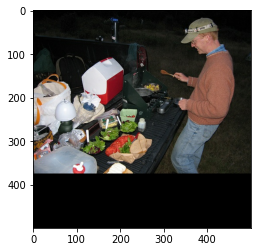

tf.Tensor(
[[0.048 0.632 1.    0.93 ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]
 [0.    0.    0.    0.   ]], shape=(5, 4), dtype=float32)


In [ ]:
%matplotlib inline

# tfds works in both Eager and Graph modes
tf.compat.v1.enable_eager_execution()

dataset = tfds.load("voc", split=tfds.Split.TRAIN, batch_size=16)
dataset = dataset.shuffle(10)

for feature in dataset.take(1):
    print(feature['image'].shape)

plt.imshow(feature['image'][5])
plt.show()

print(feature['objects']['bbox'][5])

# Step 3: Create Config

In `config.py`, we can set variables for our tasks. 

- 

In [ ]:
## modified from example_config.py => yolo3_config.py



# Step 4: Create Task




## 4.1 Detection by pre-trained models (Model Zoo)

We provide `Model Zoo` as baseline

In [ ]:
## 



## 4.2 Fine-tuning Models 

Put every pieces together. The `example_task.py` includes:

- `build_model()` :
- `build_inputs()` :
- `build_losses()` :
- `build_metrics()` :
- `train_step()` :
- `validation_step()` :
- `inference_step()` :

In [ ]:
## modified from example_task.py => yolo3_task.py

"""An example task definition for image classification."""
from typing import Any, List, Optional, Tuple, Sequence, Mapping

import tensorflow as tf

from official.common import dataset_fn
from official.core import base_task
from official.core import task_factory
from official.modeling import tf_utils
from official.vision.beta.dataloaders import input_reader_factory
from official.vision.beta.projects.yolo3 import yolo3_config as exp_cfg
from official.vision.beta.projects.yolo3 import yolo3_input
from official.vision.beta.projects.yolo3 import yolo3_model


@task_factory.register_task_cls(exp_cfg.ExampleTask)
class ExampleTask(base_task.Task):
  """Class of an example task.
  A task is a subclass of base_task.Task that defines model, input, loss, metric
  and one training and evaluation step, etc.
  """

  def build_model(self) -> tf.keras.Model:
    """Builds a model."""
    input_specs = tf.keras.layers.InputSpec(shape=[None] +
                                            self.task_config.model.input_size)

    model = yolo3_model.build_yolo3_model(
        input_specs=input_specs, model_config=self.task_config.model)
    return model

  def build_inputs(
      self,
      params: exp_cfg.ExampleDataConfig,
      input_context: Optional[tf.distribute.InputContext] = None
  ) -> tf.data.Dataset:
    """Builds input.
    The input from this function is a tf.data.Dataset that has gone through
    pre-processing steps, such as augmentation, batching, shuffuling, etc.
    Args:
      params: The experiment config.
      input_context: An optional InputContext used by input reader.
    Returns:
      A tf.data.Dataset object.
    """

    num_classes = self.task_config.model.num_classes
    input_size = self.task_config.model.input_size
    decoder = example_input.Decoder()

    parser = example_input.Parser(
        output_size=input_size[:2], num_classes=num_classes)

    reader = input_reader_factory.input_reader_generator(
        params,
        dataset_fn=dataset_fn.pick_dataset_fn(params.file_type),
        decoder_fn=decoder.decode,
        parser_fn=parser.parse_fn(params.is_training))

    dataset = reader.read(input_context=input_context)

    return dataset

  def build_losses(self,
                   labels: tf.Tensor,
                   model_outputs: tf.Tensor,
                   aux_losses: Optional[Any] = None) -> tf.Tensor:
    """Builds losses for training and validation.
    Args:
      labels: Input groundtruth labels.
      model_outputs: Output of the model.
      aux_losses: The auxiliarly loss tensors, i.e. `losses` in tf.keras.Model.
    Returns:
      The total loss tensor.
    """
    total_loss = tf.keras.losses.sparse_categorical_crossentropy(
        labels, model_outputs, from_logits=True)
    total_loss = tf_utils.safe_mean(total_loss)

    if aux_losses:
      total_loss += tf.add_n(aux_losses)

    return total_loss

  def build_metrics(self,
                    training: bool = True) -> Sequence[tf.keras.metrics.Metric]:
    """Gets streaming metrics for training/validation.
    This function builds and returns a list of metrics to compute during
    training and validation. The list contains objects of subclasses of
    tf.keras.metrics.Metric. Training and validation can have different metrics.
    Args:
      training: Whether the metric is for training or not.
    Returns:
     A list of tf.keras.metrics.Metric objects.
    """
    k = self.task_config.evaluation.top_k
    metrics = [
        tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.SparseTopKCategoricalAccuracy(
            k=k, name='top_{}_accuracy'.format(k))
    ]
    return metrics

  def train_step(self,
                 inputs: Tuple[Any, Any],
                 model: tf.keras.Model,
                 optimizer: tf.keras.optimizers.Optimizer,
                 metrics: Optional[List[Any]] = None) -> Mapping[str, Any]:
    """Does forward and backward.
    This example assumes input is a tuple of (features, labels), which follows
    the output from data loader, i.e., Parser. The output from Parser is fed
    into train_step to perform one step forward and backward pass. Other data
    structure, such as dictionary, can also be used, as long as it is consistent
    between output from Parser and input used here.
    Args:
      inputs: A tuple of of input tensors of (features, labels).
      model: A tf.keras.Model instance.
      optimizer: The optimizer for this training step.
      metrics: A nested structure of metrics objects.
    Returns:
      A dictionary of logs.
    """
    features, labels = inputs
    num_replicas = tf.distribute.get_strategy().num_replicas_in_sync
    with tf.GradientTape() as tape:
      outputs = model(features, training=True)
      # Casting output layer as float32 is necessary when mixed_precision is
      # mixed_float16 or mixed_bfloat16 to ensure output is casted as float32.
      outputs = tf.nest.map_structure(lambda x: tf.cast(x, tf.float32), outputs)

      # Computes per-replica loss.
      loss = self.build_losses(
          model_outputs=outputs, labels=labels, aux_losses=model.losses)
      # Scales loss as the default gradients allreduce performs sum inside the
      # optimizer.
      scaled_loss = loss / num_replicas

      # For mixed_precision policy, when LossScaleOptimizer is used, loss is
      # scaled for numerical stability.
      if isinstance(optimizer, tf.keras.mixed_precision.LossScaleOptimizer):
        scaled_loss = optimizer.get_scaled_loss(scaled_loss)

    tvars = model.trainable_variables
    grads = tape.gradient(scaled_loss, tvars)
    # Scales back gradient before apply_gradients when LossScaleOptimizer is
    # used.
    if isinstance(optimizer, tf.keras.mixed_precision.LossScaleOptimizer):
      grads = optimizer.get_unscaled_gradients(grads)
    optimizer.apply_gradients(list(zip(grads, tvars)))

    logs = {self.loss: loss}
    if metrics:
      self.process_metrics(metrics, labels, outputs)
    return logs

  def validation_step(self,
                      inputs: Tuple[Any, Any],
                      model: tf.keras.Model,
                      metrics: Optional[List[Any]] = None) -> Mapping[str, Any]:
    """Runs validatation step.
    Args:
      inputs: A tuple of of input tensors of (features, labels).
      model: A tf.keras.Model instance.
      metrics: A nested structure of metrics objects.
    Returns:
      A dictionary of logs.
    """
    features, labels = inputs
    outputs = self.inference_step(features, model)
    outputs = tf.nest.map_structure(lambda x: tf.cast(x, tf.float32), outputs)
    loss = self.build_losses(
        model_outputs=outputs, labels=labels, aux_losses=model.losses)

    logs = {self.loss: loss}
    if metrics:
      self.process_metrics(metrics, labels, outputs)
    return logs

  def inference_step(self, inputs: tf.Tensor, model: tf.keras.Model) -> Any:
    """Performs the forward step. It is used in validation_step."""
    return model(inputs, training=False)

# Step 5: Import Registry


In [ ]:
from official.vision.beta.configs import video_classification
from official.vision.beta.projects.yolo_.configs import darknet as darknet_configs
from official.vision.beta.projects.yolo_beta.modeling import darknet
from official.vision.beta.projects.yolo_beta.modeling import darknet_layers
from official.vision.beta.projects.yolo_beta.modeling import darknet_model

# pylint: disable=unused-import
from tensorflow_models.official.common import registry_imports
from tensorflow_models.official.vision.beta.projects.yolo3 import yolo3_config
from tensorflow_models.official.vision.beta.projects.yolo3 import yolo3_input
from tensorflow_models.official.vision.beta.projects.yolo3 import yolo3_model
from tensorflow_models.official.vision.beta.projects.yolo3 import yolo3_task

## Import Registry

```python
# pylint: disable=unused-import
from tensorflow_models.official.common import registry_imports
from tensorflow_models.official.vision.beta.projects.example import example_config
from tensorflow_models.official.vision.beta.projects.example import example_input
from tensorflow_models.official.vision.beta.projects.example import example_model
from tensorflow_models.official.vision.beta.projects.example import example_task
```

# Step 6: Train Model 

## Using Model Zoo as baseline + model train 

